<a href="https://colab.research.google.com/github/fishitmo/Takeobds/blob/main/Customer_churn_prediction_Telecom_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Customer churn prediction: Telecom Churn Dataset**
Customer churn, also known as customer retention, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
import matplotlib.pyplot as plt # visualization
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings

#**1. Data overview**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving churn-bigml-80.csv to churn-bigml-80.csv


In [3]:
filename = next(iter(uploaded))

In [4]:
train = pd.read_csv(filename)

In [5]:
from google.colab import files
uploaded = files.upload()

Saving churn-bigml-20 (1).csv to churn-bigml-20 (1).csv


In [6]:
filename = next(iter(uploaded))

In [7]:
test = pd.read_csv(filename)

In [8]:
train.shape

(2666, 20)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [10]:
test.shape

(667, 20)

In [11]:
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [13]:
#All continous variables in cname
cname = train.columns[(train.dtypes=="float64")|(train.dtypes=="int64")].tolist()
print(cname)

['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']


In [14]:
#All categorical var in cat_names and removing target var
cat_names = train.select_dtypes(exclude=np.number).columns.tolist()
cat_names.remove('Churn')
cat_names

['State', 'International plan', 'Voice mail plan']

In [15]:
train['International plan'].value_counts()

No     2396
Yes     270
Name: International plan, dtype: int64

#**Checking Missing Value in Data**

In [16]:
#Checking missing values in train dataset
print(train.isnull().sum())

#no missing value present in the train data

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [17]:
#Checking missing values in test data set
print(test.isnull().sum())

#no missing value present in the test data

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


**No missing value found in both train and test data set**

#**Visualizing data**

<ipython-input-18-0aed5ac57e35>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




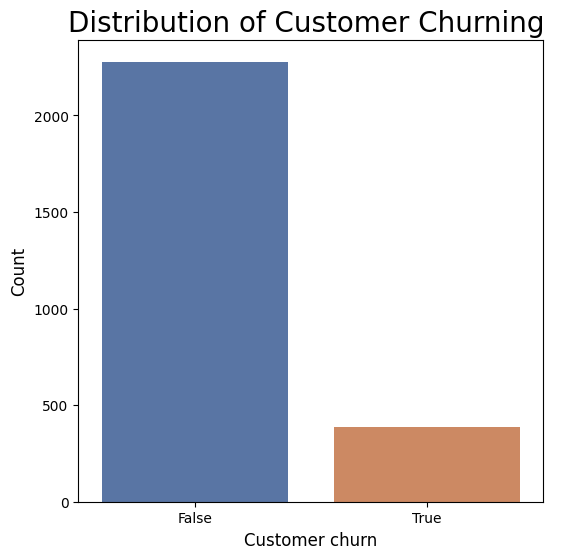

In [18]:
#Target Variable data distribution
plt.figure(figsize=(6,6))
sns.countplot(x = train.Churn,palette='deep')
plt.xlabel('Customer churn', fontsize= 12)
plt.ylabel('Count', fontsize= 12)
plt.title("Distribution of Customer Churning ",fontsize= 20)
plt.show()

**It is clearr that we have a class imbalance problem**

In [19]:
#Relationational bar graph for checking data distribution with respect to target variable
def diff_bar(x,y):

    train.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

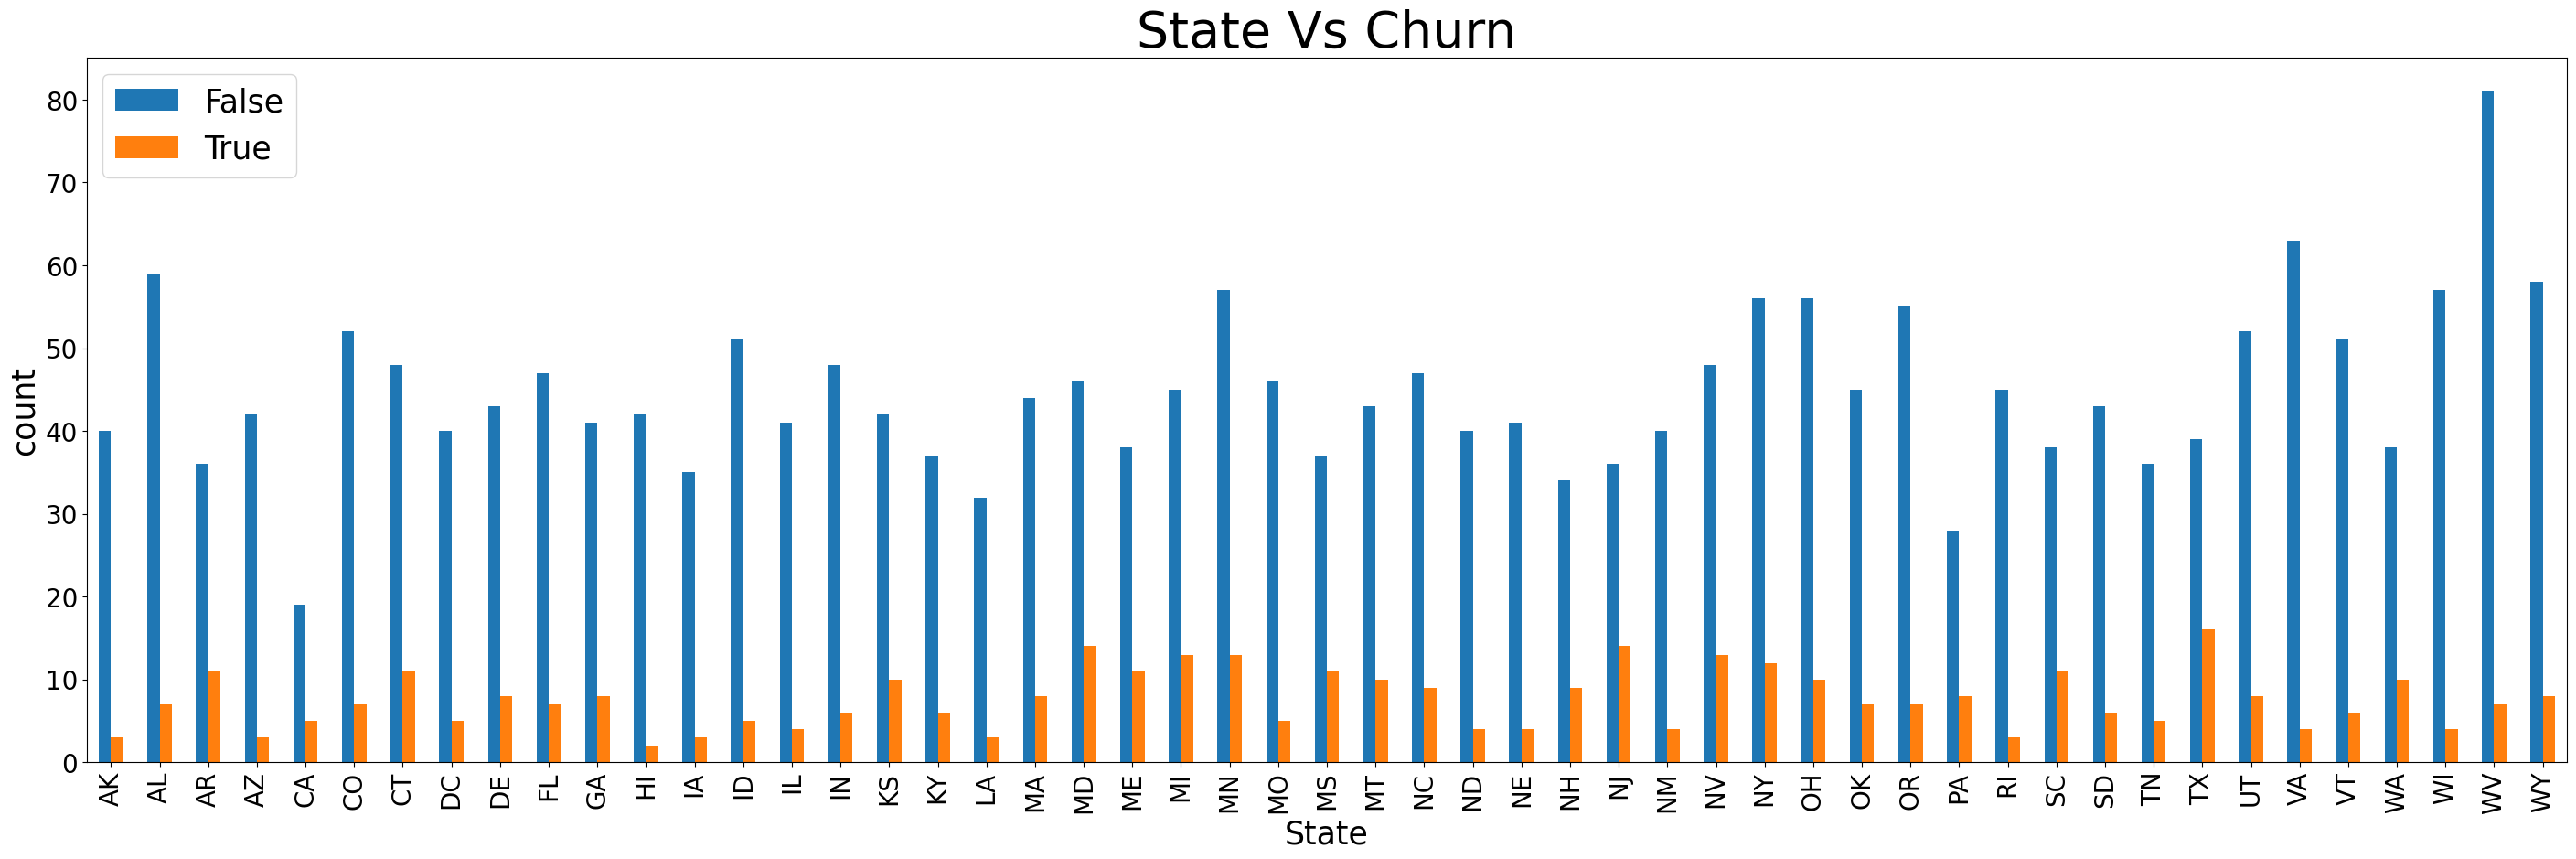

In [21]:
#State Wise Churning of customer
diff_bar('State','Churn')

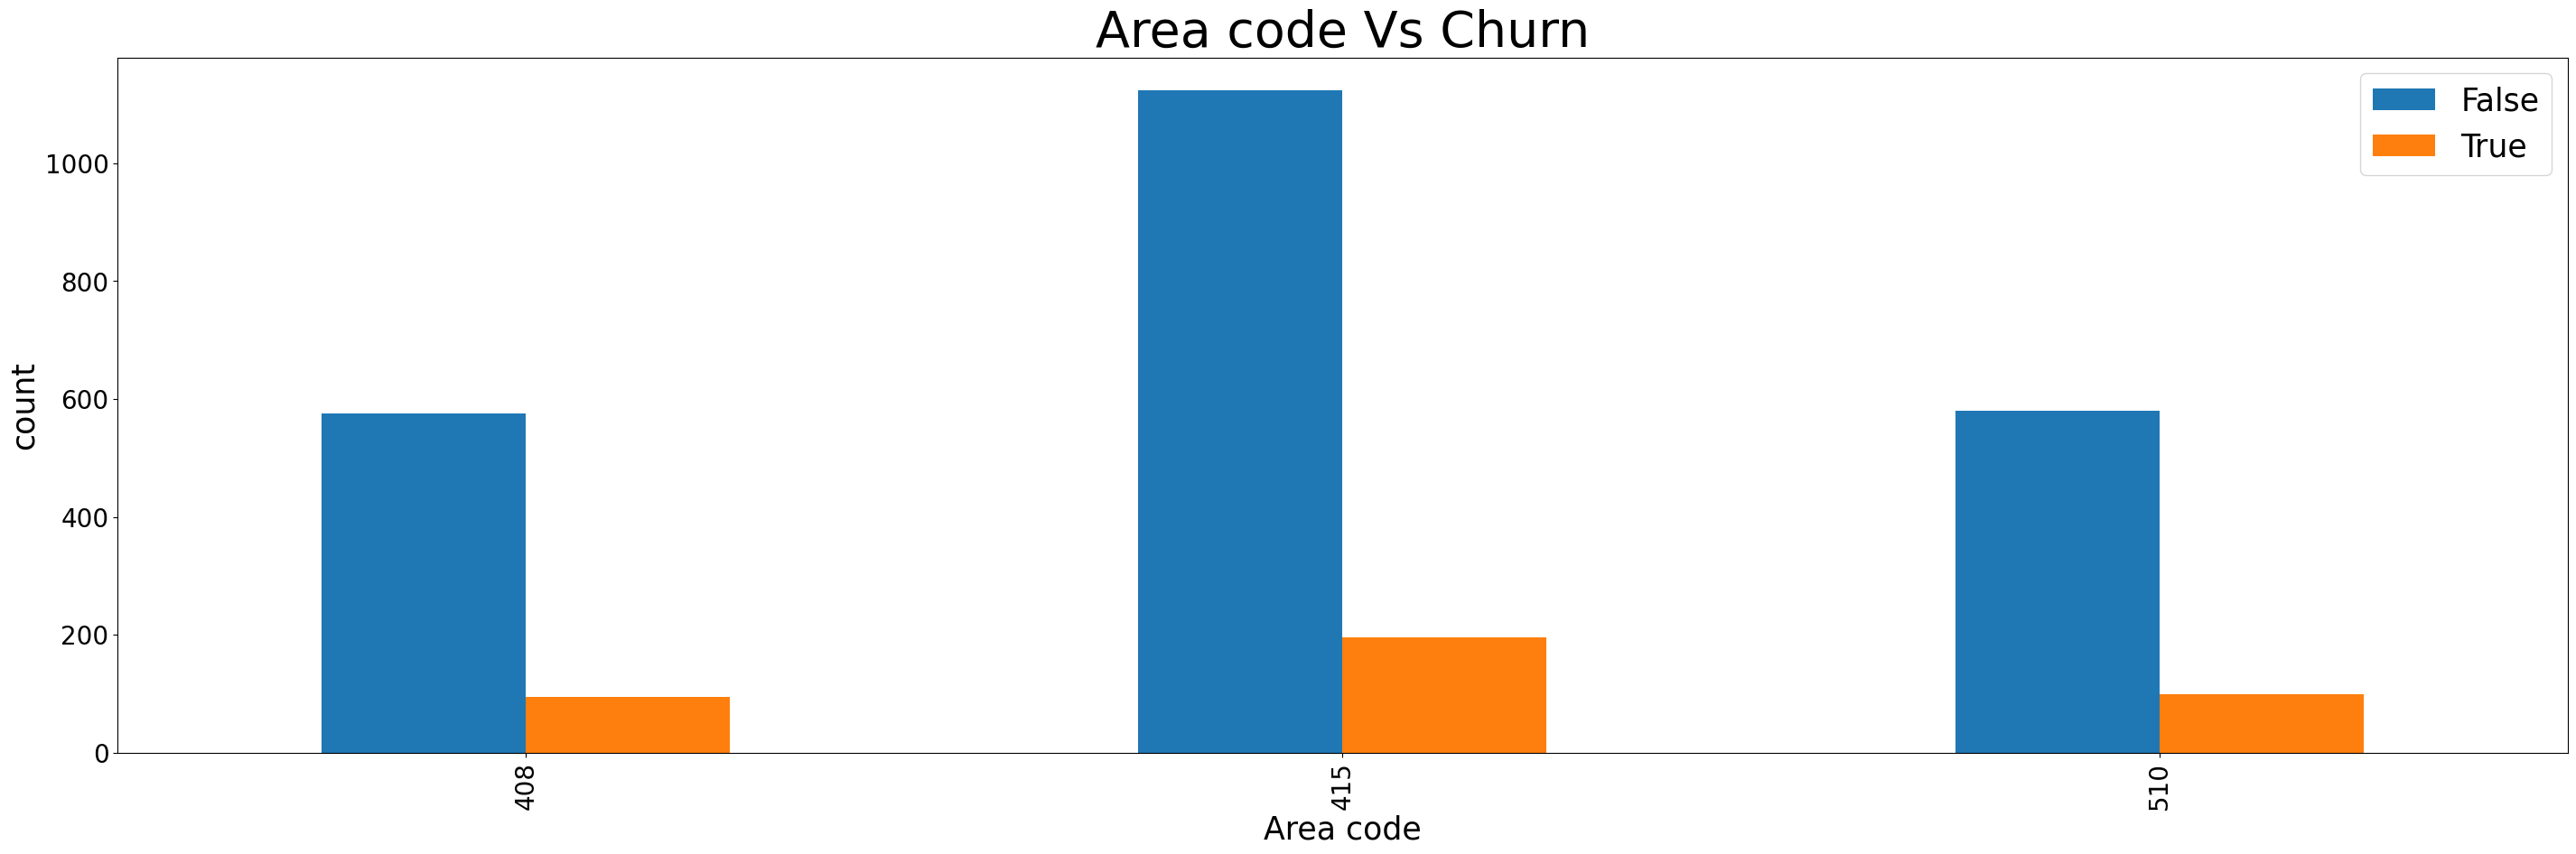

In [20]:
#area_code Wise Churning of customer
diff_bar('Area code','Churn')

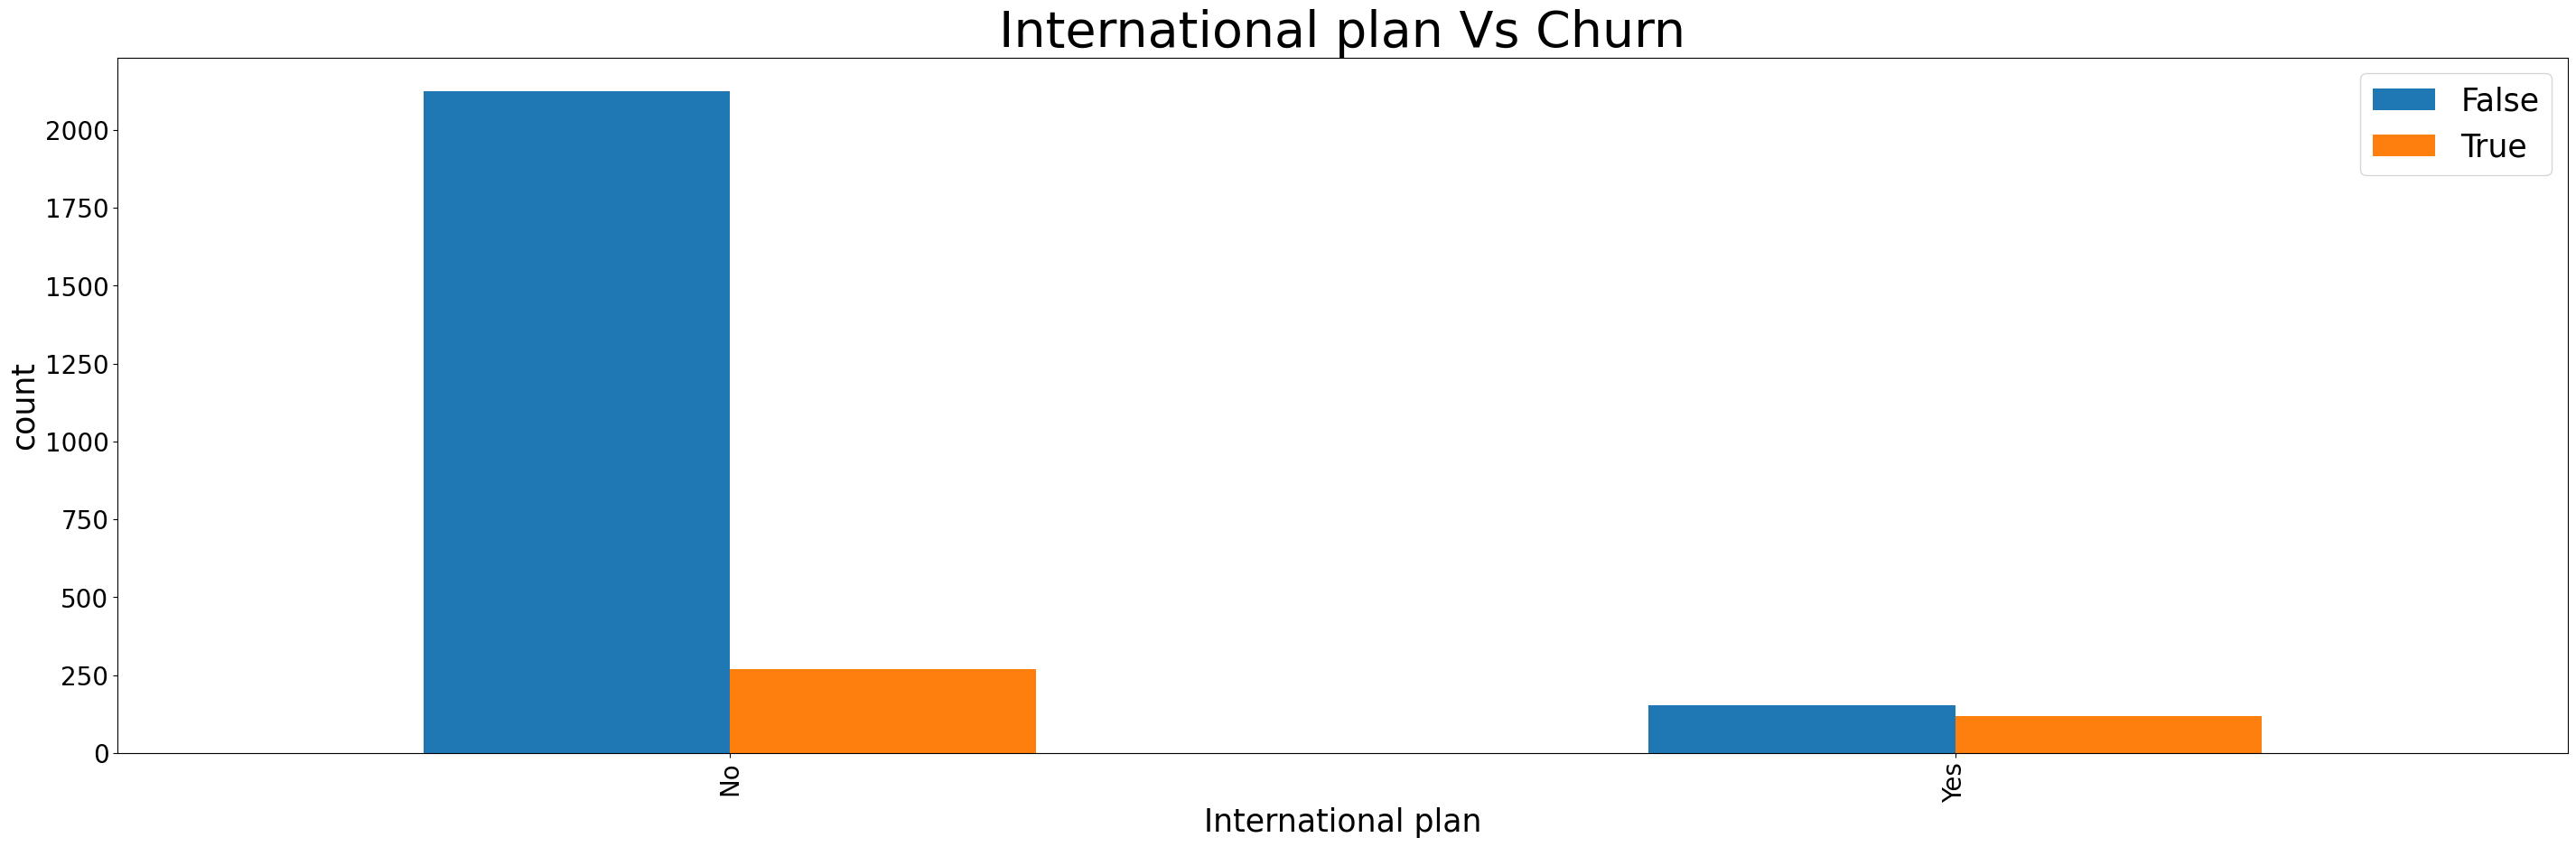

In [22]:
#International_Plan Wise Churning of customer
diff_bar('International plan','Churn')

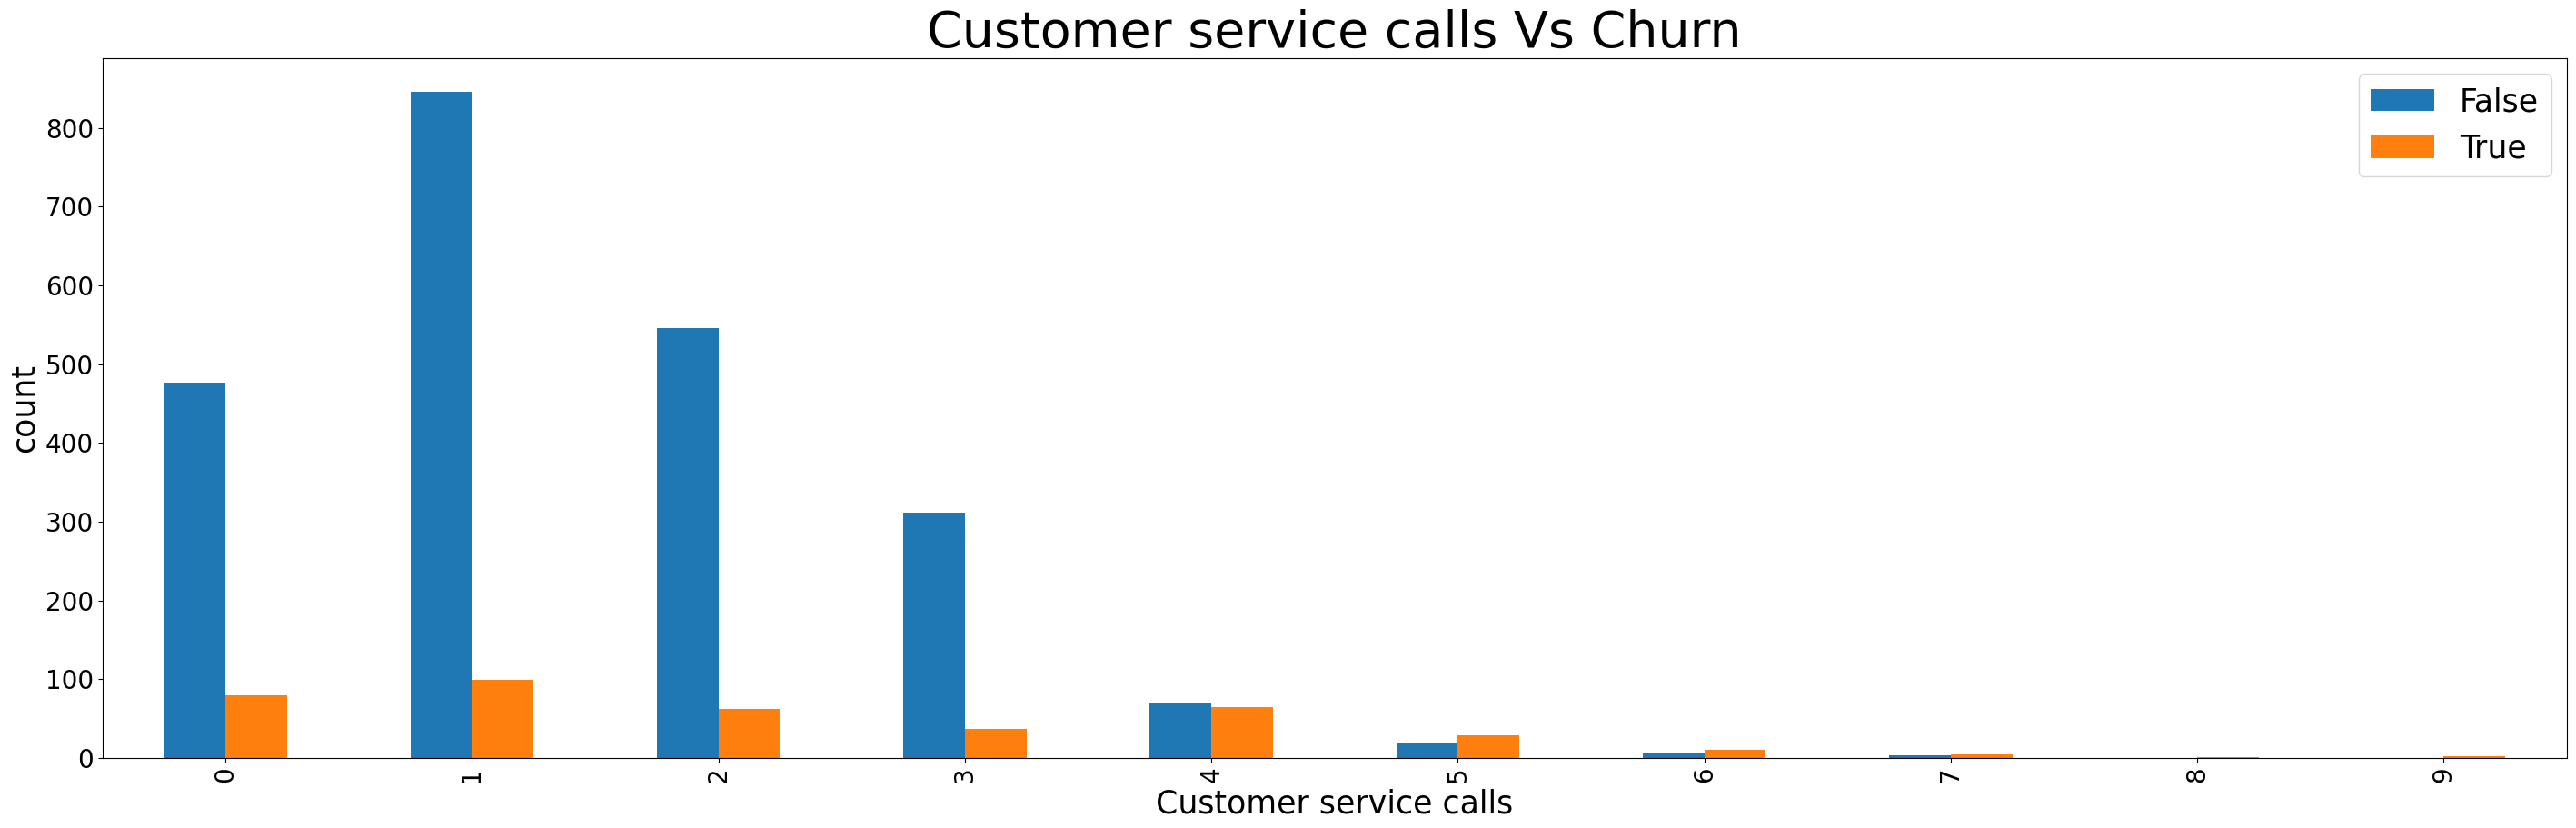

In [23]:
#Number of Customer_Service Call Wise Churning of customer
diff_bar('Customer service calls','Churn')

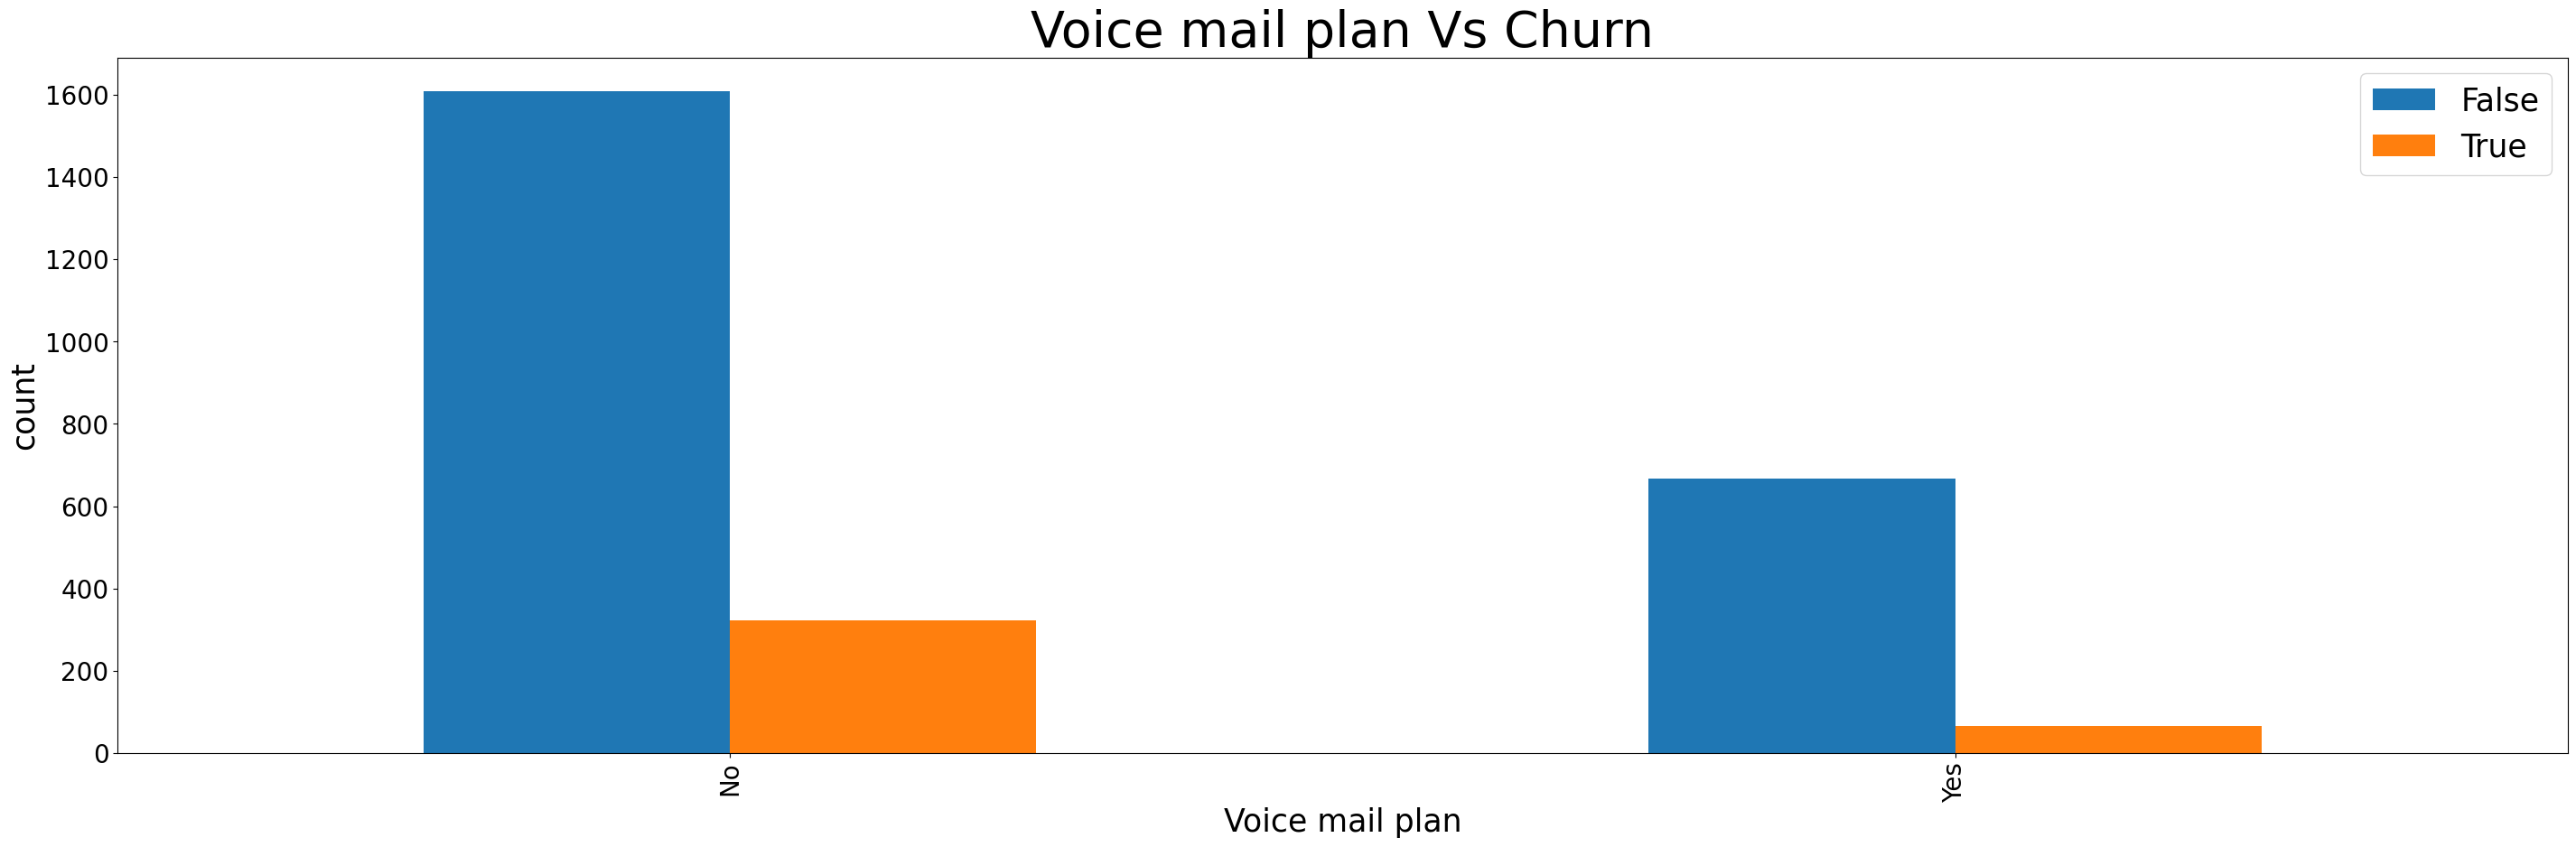

In [24]:
#No. of Customer Churning and had a Voice mail plan
diff_bar('Voice mail plan','Churn')

In [25]:
#Scatter plot function
def diff_scattr(x,y):
    fig = plt.figure()
    fig = sns.lmplot(x=x,y=y, data=train,fit_reg=False)
    plt.xlabel(x,fontsize= 14)
    plt.ylabel(y,fontsize= 14)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.title("{X} and {Y} Scatter Plot".format(X=x,Y=y),fontsize = 16)
    #fig.savefig("{X}_and_{Y}_Scatter_Plot..png".format(X=x,Y=y))
    plt.show()

<Figure size 640x480 with 0 Axes>

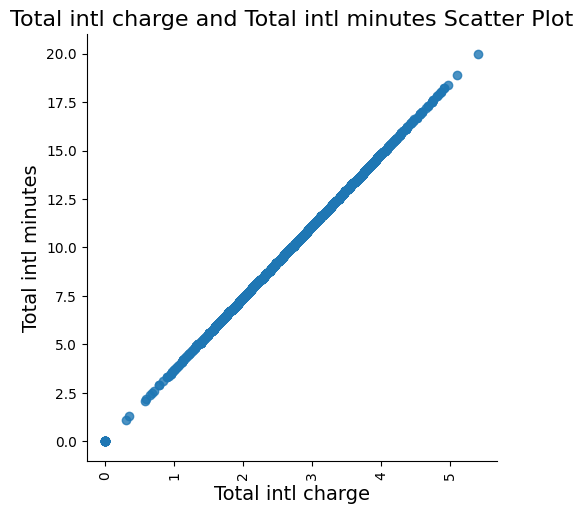

In [26]:
#Total intl charge and Total intl Minute
diff_scattr('Total intl charge','Total intl minutes')

<Figure size 640x480 with 0 Axes>

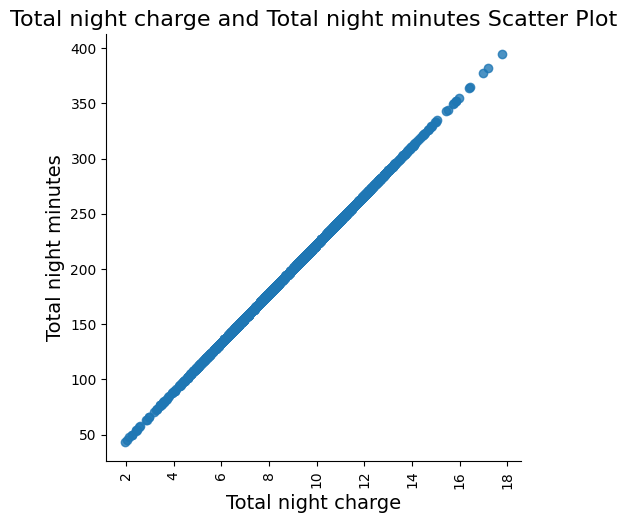

In [27]:
## Total night charge and Total night Minute
diff_scattr('Total night charge','Total night minutes')

<Figure size 640x480 with 0 Axes>

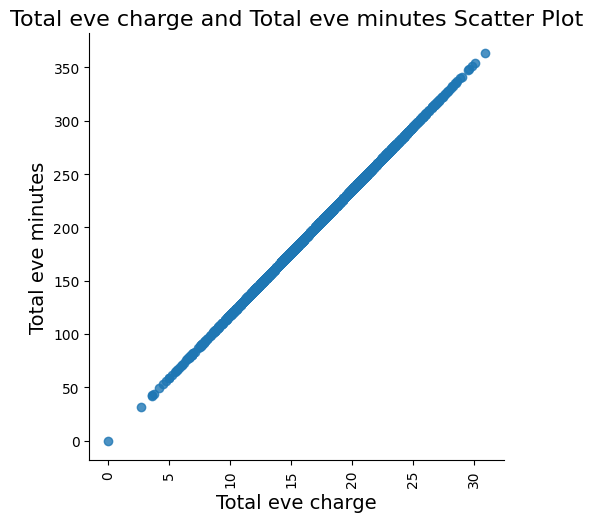

In [28]:
#Total eve charge and Total eve Minute
diff_scattr('Total eve charge','Total eve minutes')

<Figure size 640x480 with 0 Axes>

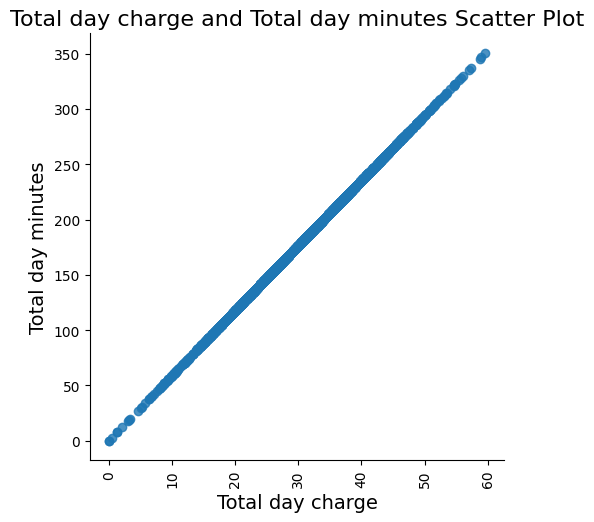

In [29]:
#Total day charge and Total Day Minute
diff_scattr('Total day charge','Total day minutes')

#**Changing Categorical colum values to numeric codes**

In [30]:
#function for converting categoric to num codes
def cat_to_num(df):
    for i in range(0, df.shape[1]):
        #print(i)
        if(df.iloc[:,i].dtypes == 'object'):
            df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
            df.iloc[:,i] = df.iloc[:,i].cat.codes
            df.iloc[:,i] = df.iloc[:,i].astype('object')
    return df

In [31]:
train = cat_to_num(train)
test = cat_to_num(test)

<ipython-input-30-87d46e5f8c11>:6: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-30-87d46e5f8c11>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-30-87d46e5f8c11>:6: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-30-87d46e5f8c11>:7: DeprecationWarning:

In a future version,

In [32]:
train.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


#**Anomaly Detections or Outlier Analysis**

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




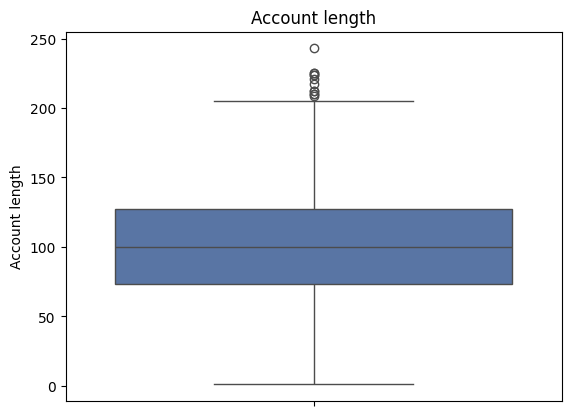

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




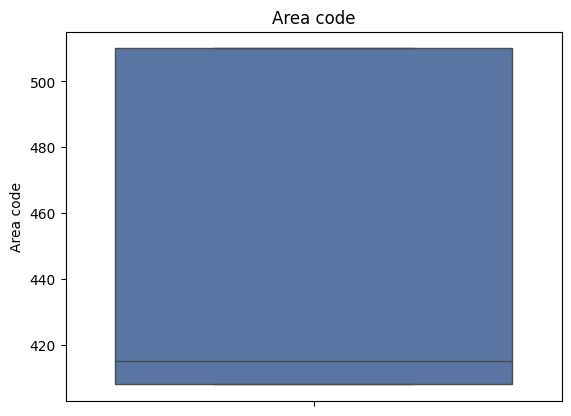

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




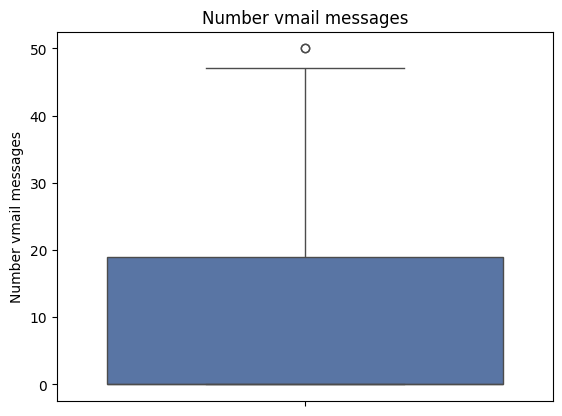

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




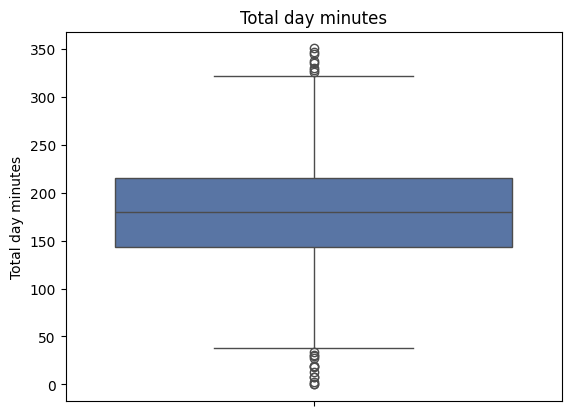

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




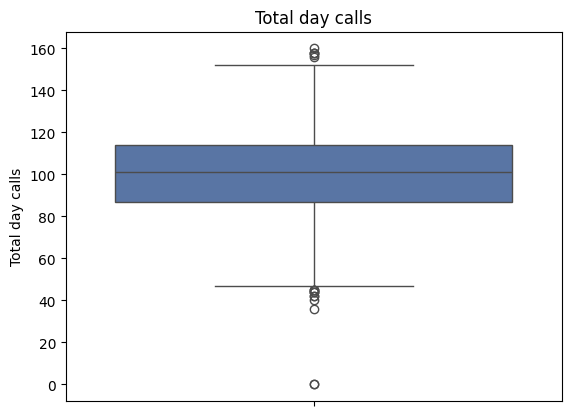

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




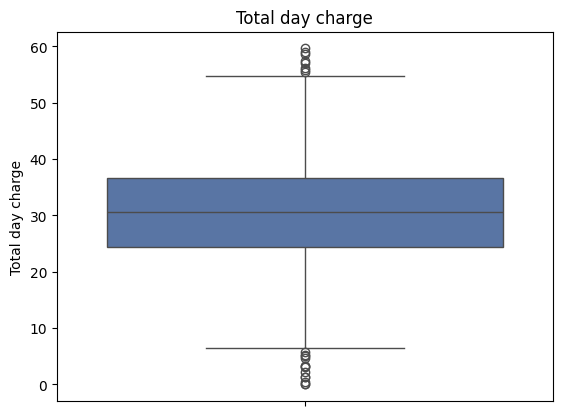

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




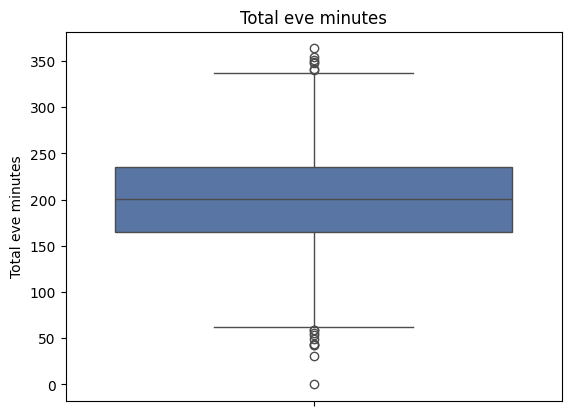

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




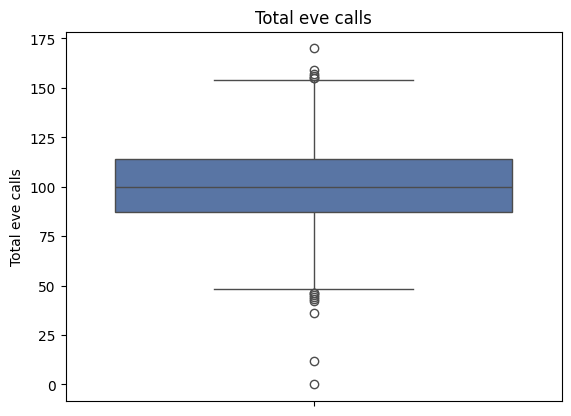

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




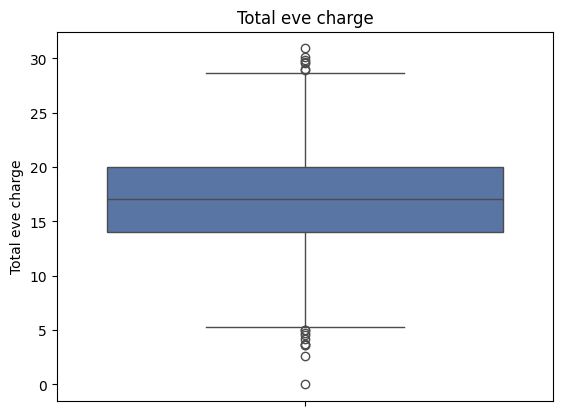

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




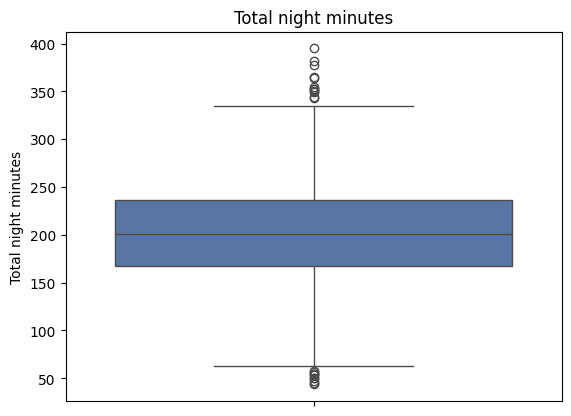

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




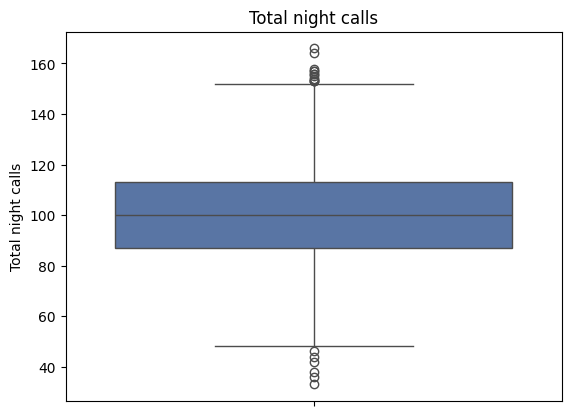

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




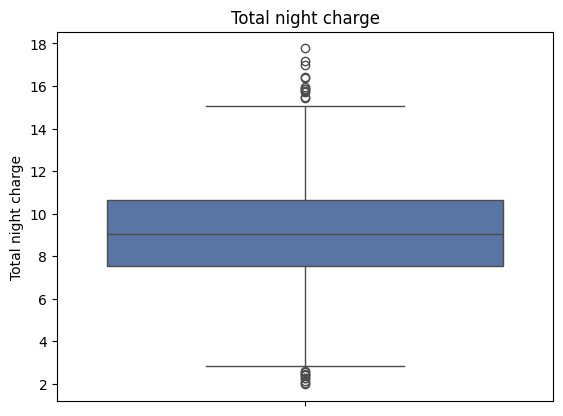

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




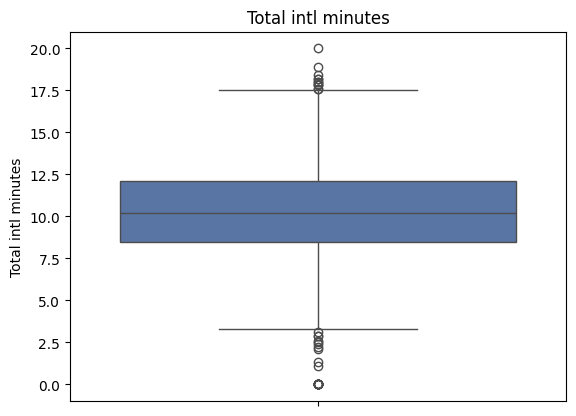

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




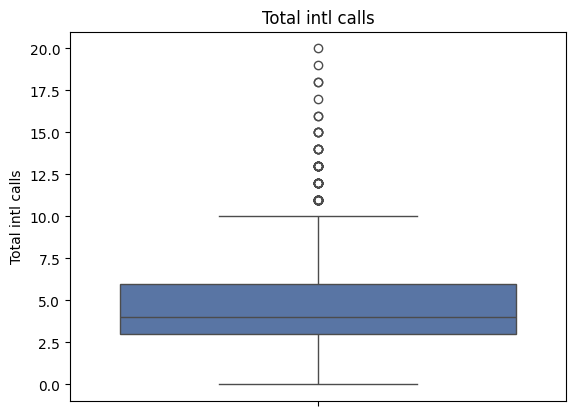

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




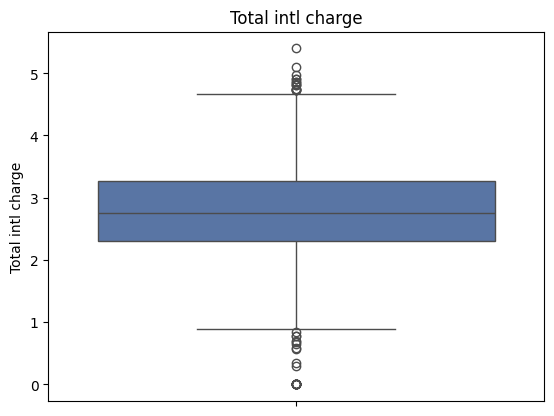

<ipython-input-33-58b7c2cd917c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




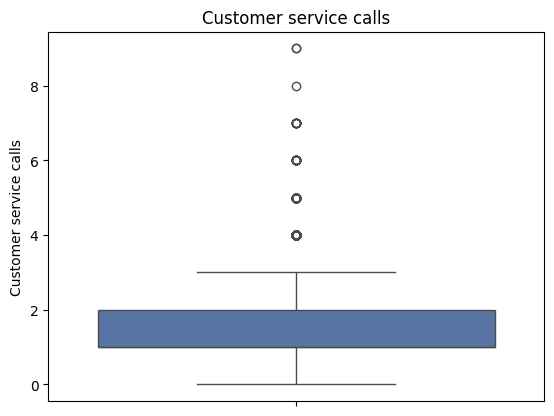

In [33]:
# #Plotting Box Plot
for i in cname:
    plt.figure()
    plt.clf() #clearing the figure
    sns.boxplot(train[i],palette="deep")
    plt.title(i)
    plt.show()

In [34]:
#Treating Out Liers and Converting them to nan
for i in cname:
    #print(i)
    q75, q25 = np.percentile(train.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
#Converting to nan
    train.loc[train.loc[:,i] < minn,i] = np.nan
    train.loc[train.loc[:,i] > maxx,i] = np.nan
    print('{var} -----> {X}   Missing'.format(var = i, X = (train.loc[:,i].isnull().sum())))

Account length -----> 12   Missing
Area code -----> 0   Missing
Number vmail messages -----> 2   Missing
Total day minutes -----> 21   Missing
Total day calls -----> 18   Missing
Total day charge -----> 21   Missing
Total eve minutes -----> 17   Missing
Total eve calls -----> 15   Missing
Total eve charge -----> 17   Missing
Total night minutes -----> 22   Missing
Total night calls -----> 19   Missing
Total night charge -----> 22   Missing
Total intl minutes -----> 37   Missing
Total intl calls -----> 66   Missing
Total intl charge -----> 40   Missing
Customer service calls -----> 210   Missing


In [35]:
# Imputing with mean because fancyimpute not working
for i in cname:
    print (i)
    train = train.apply(lambda x:x.fillna(train.loc[:,i].mean()))

Account length
Area code
Number vmail messages
Total day minutes
Total day calls
Total day charge
Total eve minutes
Total eve calls
Total eve charge
Total night minutes
Total night calls
Total night charge
Total intl minutes
Total intl calls
Total intl charge
Customer service calls


In [37]:
train.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128.0,415.0,0,1,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,35,107.0,415.0,0,1,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,False
2,31,137.0,415.0,0,0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False


#**Feature Selections**

<ipython-input-38-81223752d8d8>:8: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



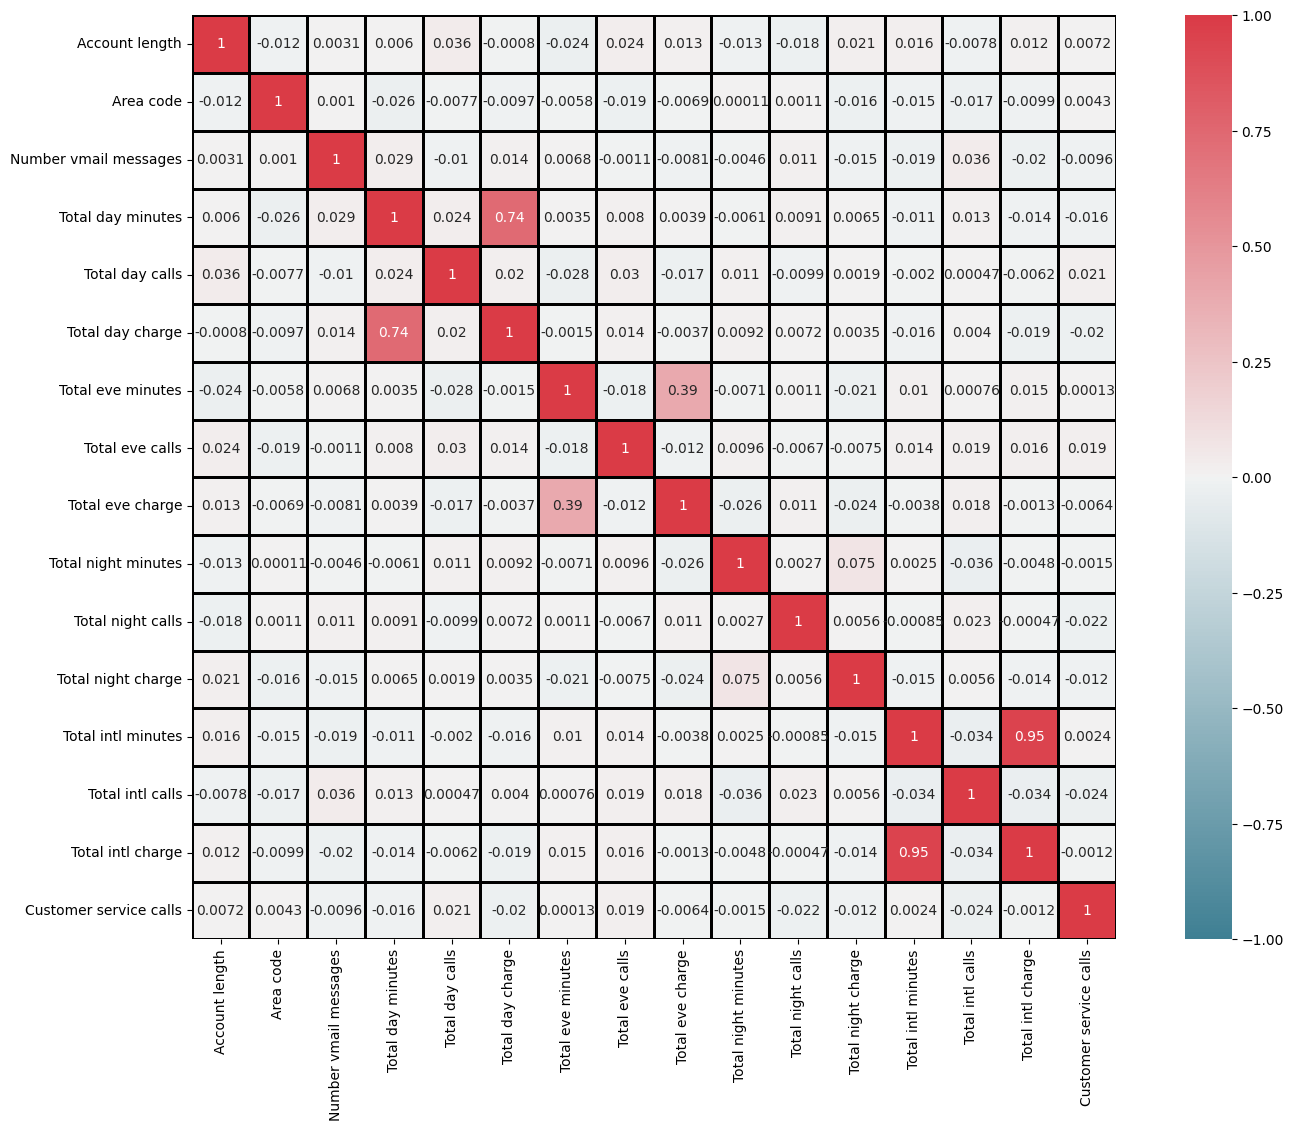

In [38]:
#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(18,12))  #Width,height

#Generating Corelation Matrix
corr = train[cname].corr()

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()
#f.savefig('heatmap.png')

#**Chi-Square for Categorical variables**

In [39]:

#checking Relation b/w categorical variables with respect to target var
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    #As we know imput to chi square is always a contiguency table so we generating it using crostab function present in pd
    chi2, p, dof, ex =chi2_contingency(pd.crosstab(train['Churn'],train[i]))
    #as above pd.crosstab(dependent variable , independent variable)
    print(p)

#chi2 = Actual chi square test value
#p = pvalue
#dof = degree of freedom
#ex = expected value

# As if p value is less than 0.05 then we will reject null hypothesis
#Null = both the variables are independent
#Alternate = Both the variables are not independent

State
0.004680701679944942
International plan
5.4269405491147075e-46
Voice mail plan
4.079713016862758e-07


In [41]:
#Removing correlated variable & the variable which doesn't contain any meaning full info
rmev = ['State','Total day charge','Total eve charge','Total night charge','Total intl charge']
train = train.drop(rmev,axis=1)
test = test.drop(rmev,axis=1)

In [42]:
train.head(3)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128.0,415.0,0,1,25.0,265.1,110.0,197.4,99.0,244.7,91.0,10.0,3.0,1.0,False
1,107.0,415.0,0,1,26.0,161.6,123.0,195.5,103.0,254.4,103.0,13.7,3.0,1.0,False
2,137.0,415.0,0,0,0.0,243.4,114.0,121.2,110.0,162.6,104.0,12.2,5.0,0.0,False


In [45]:
#Updating values _after removal of var
cname = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes',
         'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls',
         'Customer service calls']

#All categorical var and removing target var
cat_names = ['Area code', 'International plan', 'Voice mail plan']

print('cname :- {}'.format(cname))
print()
print('cat_name :- {}'.format(cat_names))

cname :- ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls', 'Customer service calls']

cat_name :- ['Area code', 'International plan', 'Voice mail plan']


#**Feature Scaling**

**Checking Distribution of data**

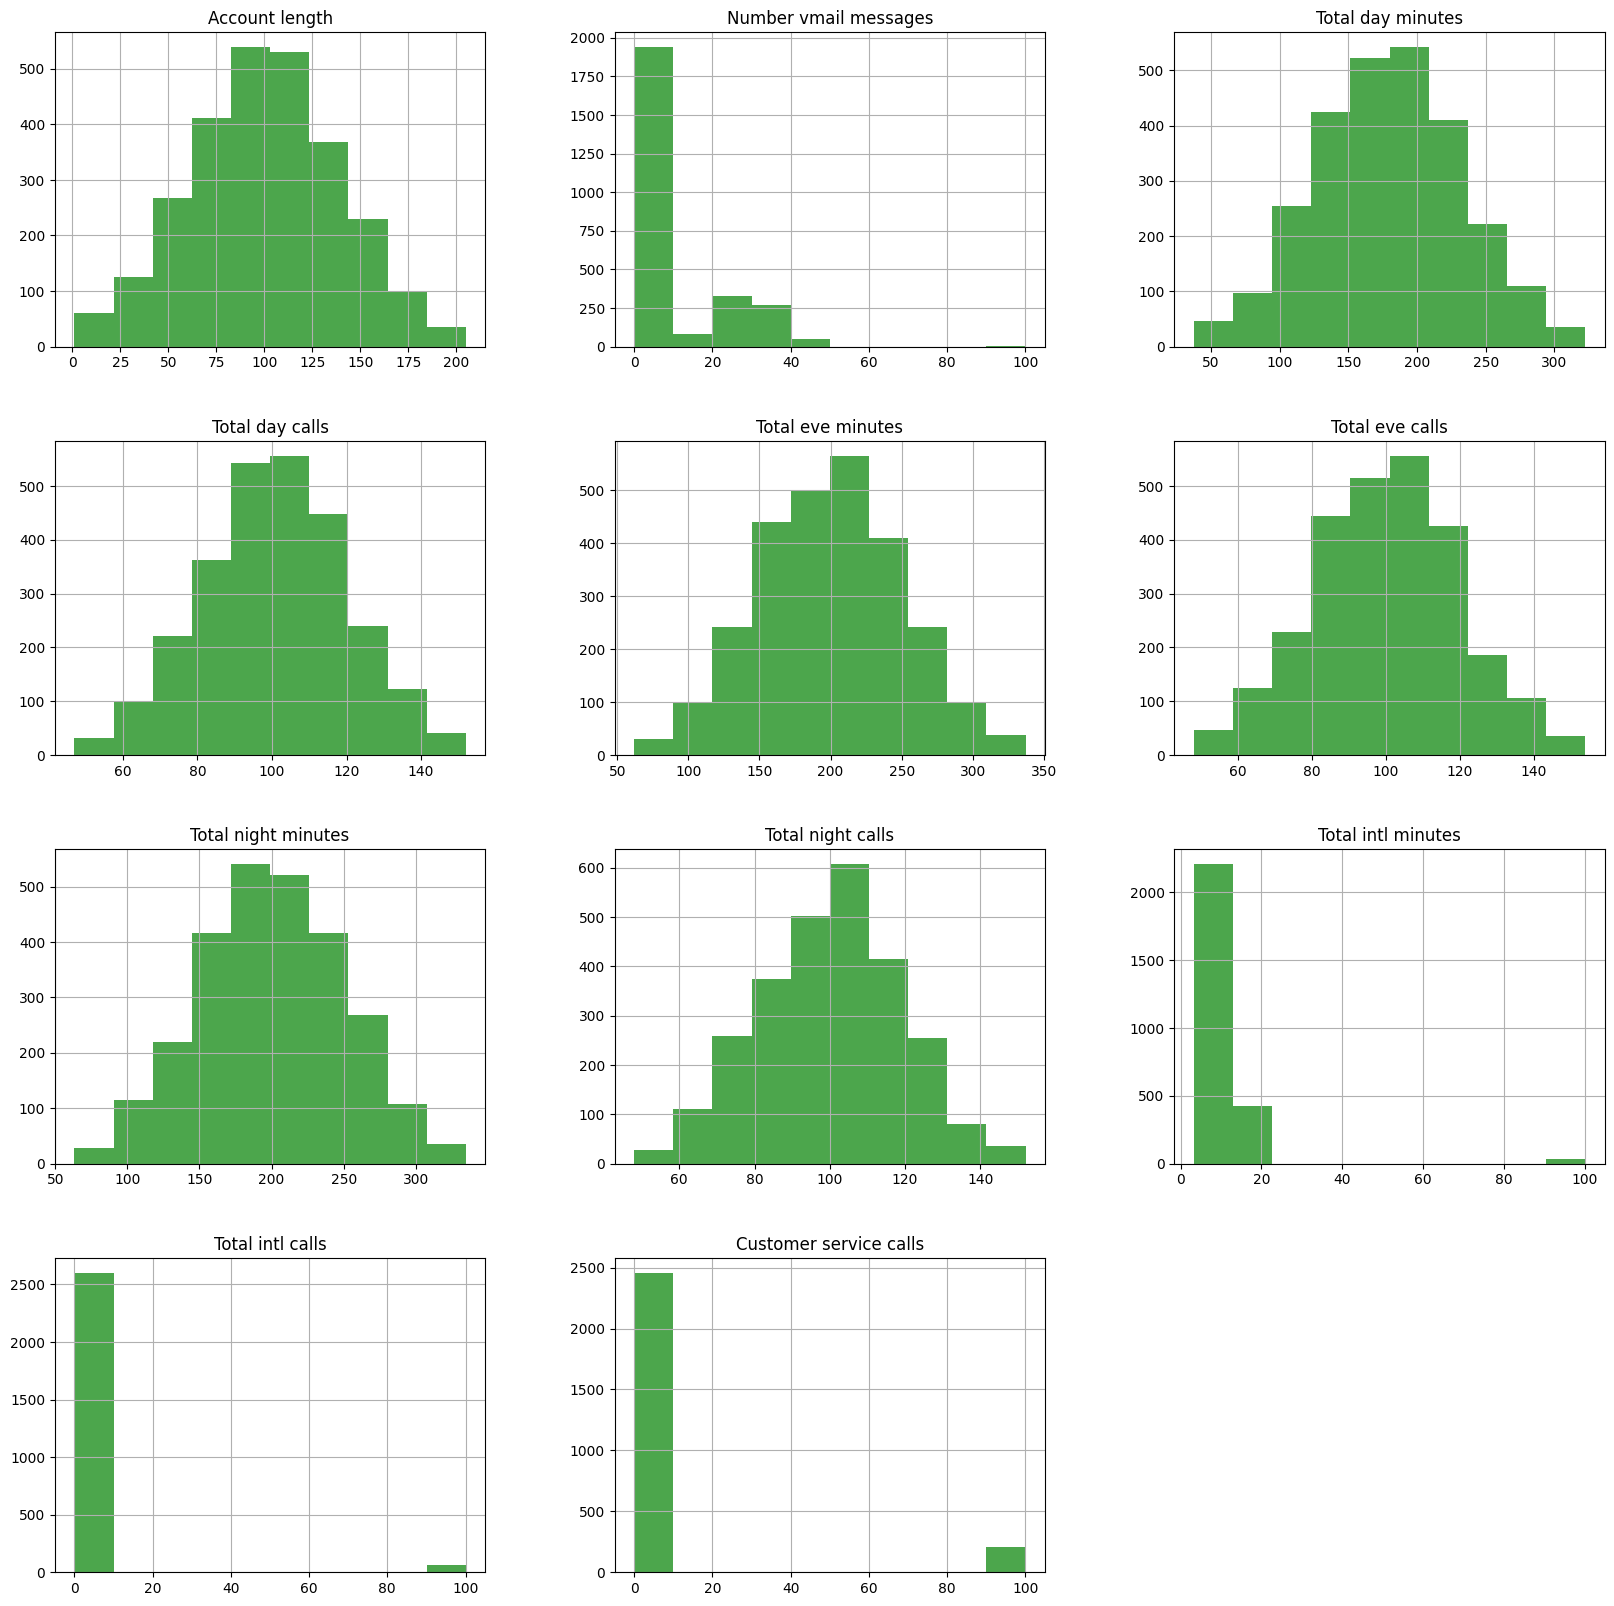

In [46]:
#Checking distribution of data via pandas visualization
train[cname].hist(figsize=(20,20),color='g',alpha = 0.7)
#plt.savefig('distribution.png')
plt.show()

In [47]:
# #Histogram breaks down by target variable
def plot_hist_y(x,y):
    plt.hist(list(x[y == 1]),color='green',label='True',bins='auto')
    plt.hist(list(x[y == 0]),color='grey', alpha = 0.7, label='False',bins='auto')
    plt.title("Histogram of {var} breakdown by {Y}".format(var = x.name,Y=y.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    plt.savefig("Histogram of {var} breakdown by {Y}.png".format(var = x.name,Y=y.name))
    plt.show()

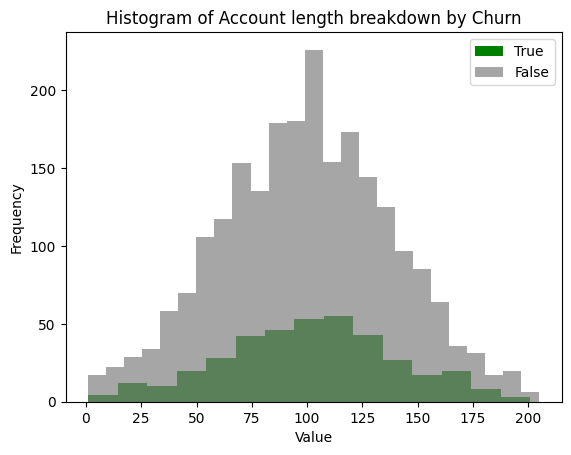

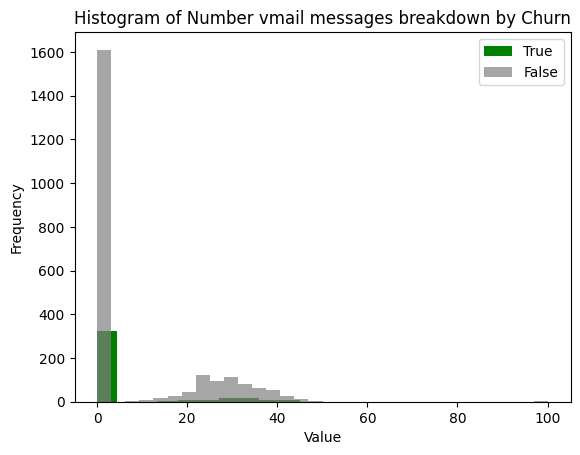

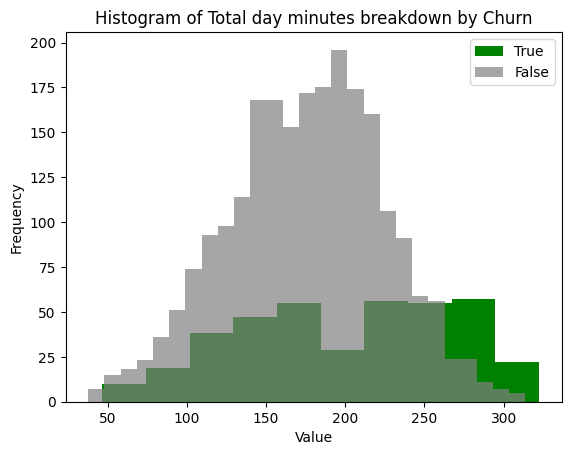

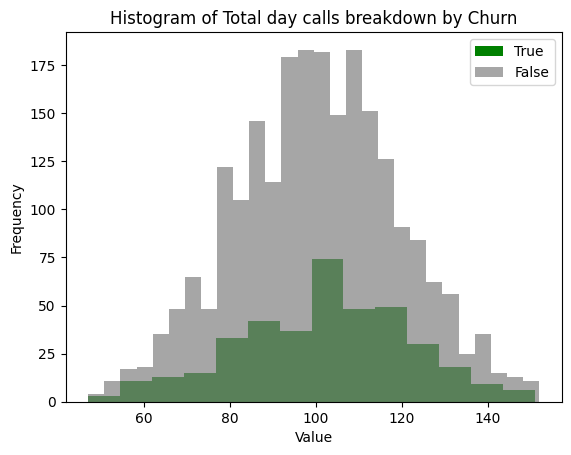

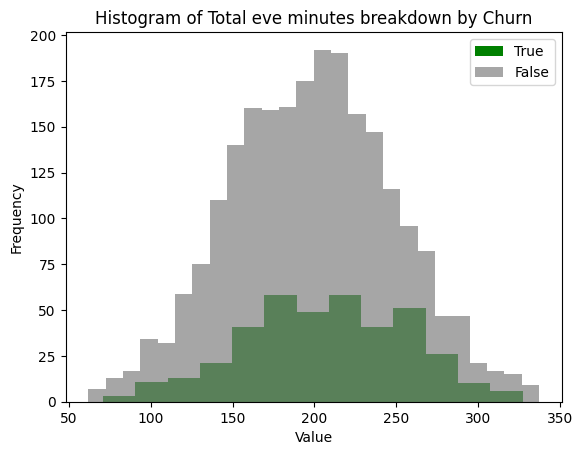

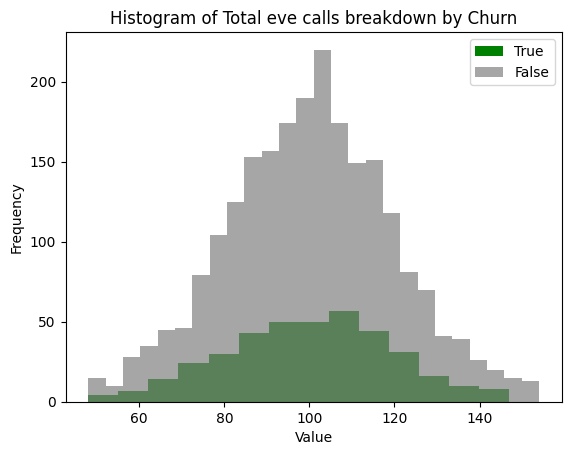

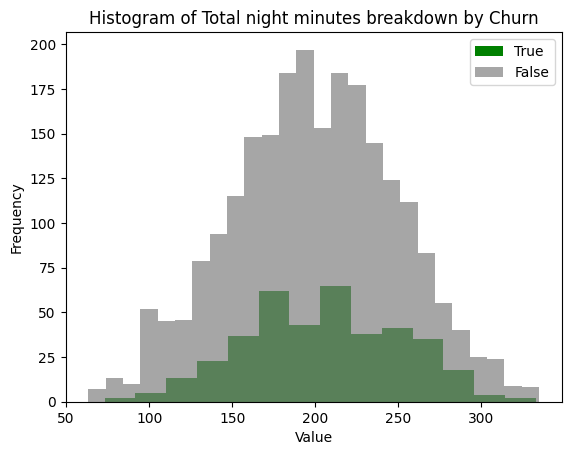

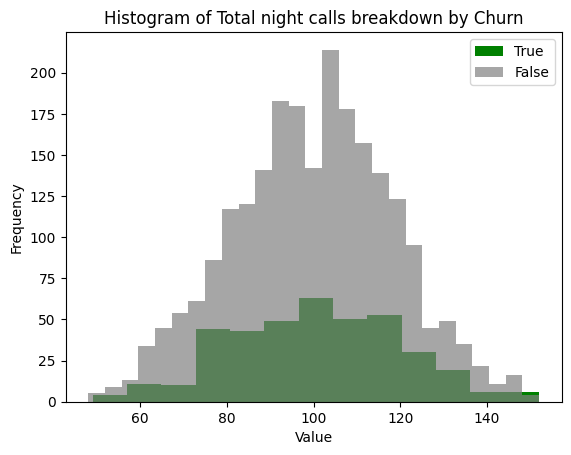

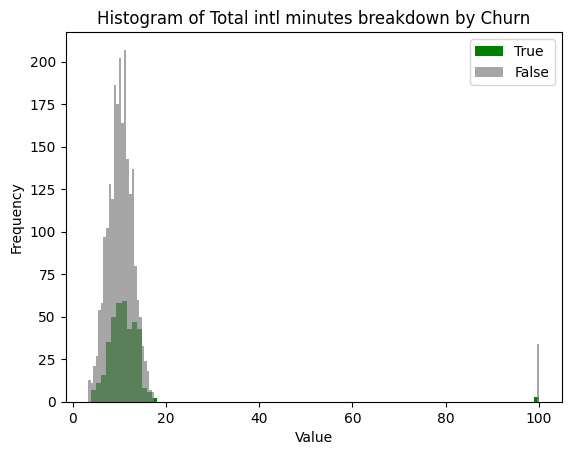

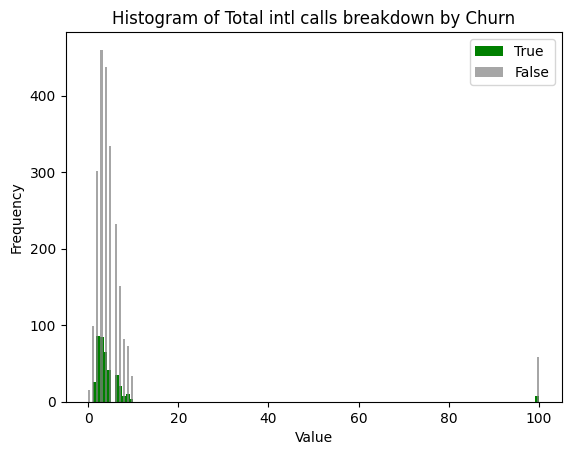

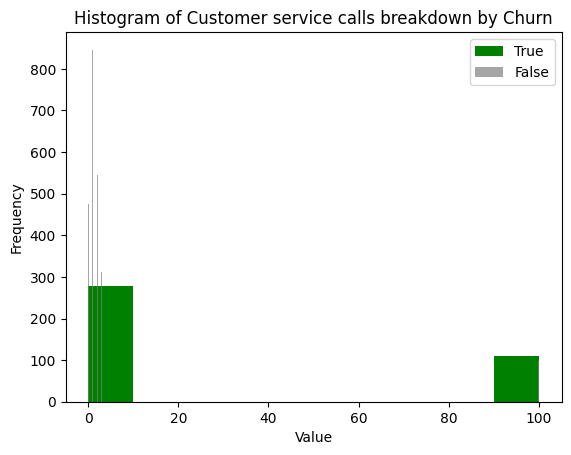

In [48]:
for i in cname:
    #print(i)
    plot_hist_y(train[i],train.Churn)

As most of the data is uniformally distributed, Hence Using data Standardization/Z-Score here

#**Scalling**

In [49]:
#Applying standarization as most of the variables are normalized distributed
def scale_standard(df):
    for i in cname:
        #print(i)
        df[i] = (df[i] - df[i].mean())/df[i].std()
    return df

In [50]:
#Standardizing Scale
train = scale_standard(train)
test = scale_standard(test)

In [51]:
train.head(3)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,0.720517,415.0,0,1,1.227937,1.628935,0.494068,-0.050789,-0.056778,0.897325,-0.477096,-0.141922,-0.241433,-0.303629,False
1,0.178510,415.0,0,1,1.300422,-0.333271,1.168073,-0.088727,0.147483,1.092828,0.161438,0.200072,-0.241433,-0.303629,False
2,0.952806,415.0,0,0,-0.584177,1.217535,0.701454,-1.572293,0.504940,-0.757396,0.214649,0.061425,-0.108384,-0.341180,False


#**Sampling Data For Train and Test**

In [52]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
#Using train test split functionality for creatuing sampling
X = train.iloc[:,:14]
y = train.iloc[:,14]
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Before smote y_train
# 0    1895
# 1     338

In [53]:
(X_train.shape),(y_train.shape)

((1786, 14), (1786,))

#**Using SMOTE (SMOTE: Synthetic Minority Over-sampling Technique)**

Due to target variable imbalance, it's good to over sample the minority class

In [54]:
!pip install imblearn

In [57]:
from imblearn.over_sampling import SMOTE

Smo = SMOTE(random_state=101)
X_train_res, y_train_res = Smo.fit_resample(X_train,y_train)

In [58]:
(X_train_res.shape,y_train_res.shape)

((3088, 14), (3088,))

#**Prediction function**

In [59]:
#Predicting & Stats Function

def pred(model_object,predictors,compare):
    """1.model_object = model name
       2.predictors = data to be predicted
       3.compare = y_train"""
    predicted = model_object.predict(predictors)
    # Determine the false positive and true positive rates
    cm = pd.crosstab(compare,predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX ------->> ")
    print(cm)
    print()

    ##check accuracy of model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('Specificity //  True Negative Rate :- ',round((TN*100)/(TN+FP),2))
    print()
    print('Sensivity // True Positive Rate // Recall :- ',round((TP*100)/(FN+TP),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))

#**Model Level Approach**
Just to check which models fits good without optimization

#**RandomForest**

In [60]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100,random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(rf_model,X_test,y_test)

# Accuracy :-  93.0
# Specificity //  True Negative Rate :-  95
# Sensivity // True Positive Rate // Recall :-  80.0
# False Negative Rate :-  20.0
# False Postive Rate :-  4.0

CONFUSION MATRIX ------->> 
col_0    0   1
Churn         
0      694  40
1       56  90

Classification paradox :------->>
Accuracy :-  89.09

Specificity //  True Negative Rate :-  94.55

Sensivity // True Positive Rate // Recall :-  61.64

False Negative Rate :-  38.36

False Postive Rate :-  5.45

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       734
           1       0.69      0.62      0.65       146

    accuracy                           0.89       880
   macro avg       0.81      0.78      0.79       880
weighted avg       0.89      0.89      0.89       880



#**Logistic Regression**

In [61]:
from sklearn.linear_model import LogisticRegression
#logistic without binaries
logit_model = LogisticRegression(random_state=101).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(logit_model,X_test,y_test)

# Classification paradox :------->>
# Accuracy :-  84.0
# Specificity //  True Negative Rate :-  85.0
# Sensivity // True Positive Rate // Recall :-  84.0
# False Negative Rate :-  15.0
# False Postive Rate :-  14.0

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      591  143
1       36  110

Classification paradox :------->>
Accuracy :-  79.66

Specificity //  True Negative Rate :-  80.52

Sensivity // True Positive Rate // Recall :-  75.34

False Negative Rate :-  24.66

False Postive Rate :-  19.48

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       734
           1       0.43      0.75      0.55       146

    accuracy                           0.80       880
   macro avg       0.69      0.78      0.71       880
weighted avg       0.86      0.80      0.82       880



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#**KNN**

In [62]:
from sklearn.neighbors import KNeighborsClassifier
#KNN Model Development
KNN_Model = KNeighborsClassifier(n_neighbors=5).fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(KNN_Model,X_test,y_test)

# Classification paradox :------->>
# Accuracy :-  77.00
# Specificity //  True Negative Rate :-  79.0
# Sensivity // True Positive Rate // Recall :-  66.0
# False Negative Rate :-  33.0
# False Postive Rate :-  20.0

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      587  147
1       60   86

Classification paradox :------->>
Accuracy :-  76.48

Specificity //  True Negative Rate :-  79.97

Sensivity // True Positive Rate // Recall :-  58.9

False Negative Rate :-  41.1

False Postive Rate :-  20.03

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       734
           1       0.37      0.59      0.45       146

    accuracy                           0.76       880
   macro avg       0.64      0.69      0.65       880
weighted avg       0.82      0.76      0.78       880



#**Naive Bayes**

In [63]:
from sklearn.naive_bayes import GaussianNB
#Navie Model Development
Naive_model = GaussianNB().fit(X_train_res,y_train_res)

#Model Score on Valdation Data Set
pred(Naive_model,X_test,y_test)

# Classification paradox :------->>
# Accuracy :-  74.0
# Specificity //  True Negative Rate :-  73.0
# Sensivity // True Positive Rate // Recall :-  84.0
# False Negative Rate :-  15.0
# False Postive Rate :-  26.0

CONFUSION MATRIX ------->> 
col_0    0    1
Churn          
0      275  459
1       27  119

Classification paradox :------->>
Accuracy :-  44.77

Specificity //  True Negative Rate :-  37.47

Sensivity // True Positive Rate // Recall :-  81.51

False Negative Rate :-  18.49

False Postive Rate :-  62.53

              precision    recall  f1-score   support

           0       0.91      0.37      0.53       734
           1       0.21      0.82      0.33       146

    accuracy                           0.45       880
   macro avg       0.56      0.59      0.43       880
weighted avg       0.79      0.45      0.50       880



#**Random Forest**

As above random forest fits best for out dataset out of our tested models

**Feature Importance**

In [64]:
# Training Final Model With Optimum Parameters
final_Model = RandomForestClassifier(random_state=101, n_estimators = 500,n_jobs=-1)
final_Model.fit(X_train_res,y_train_res)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=101)

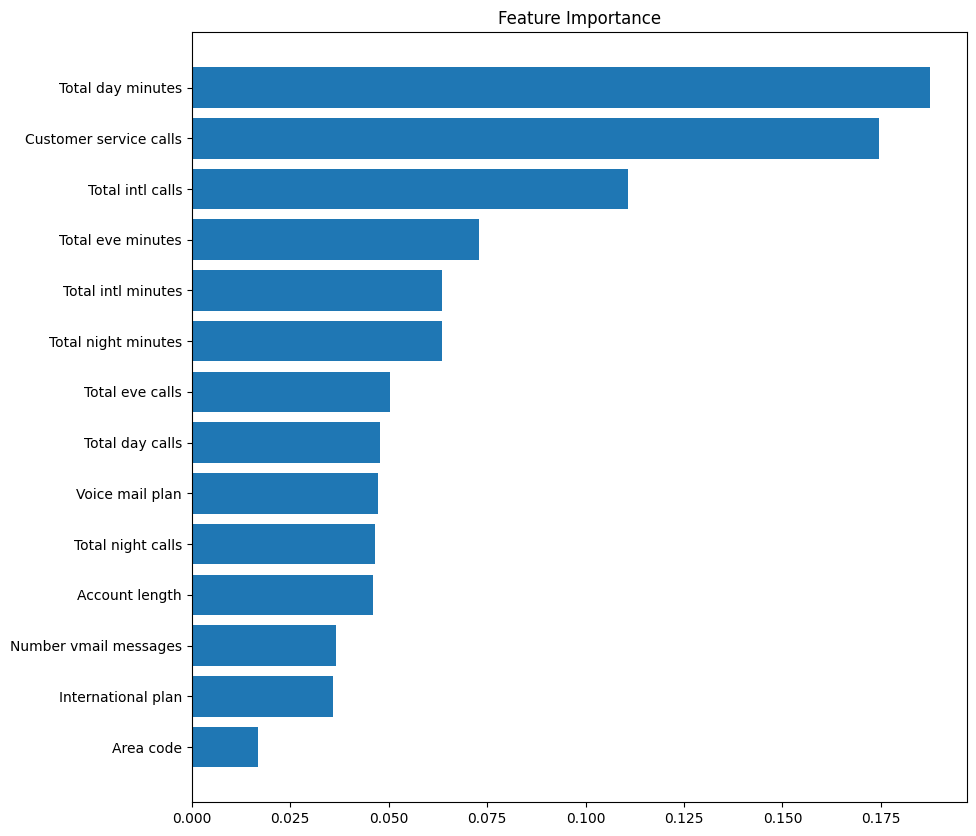

In [65]:
#Calculating feature importances
importances = final_Model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [train.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(10,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(X.shape[1]),importances[indices],align = 'center')
plt.yticks(range(X.shape[1]), names)
plt.show()
#fig.savefig('feature_importance.png')

#**AUC and ROC Curve**

ROC AUC: 0.88


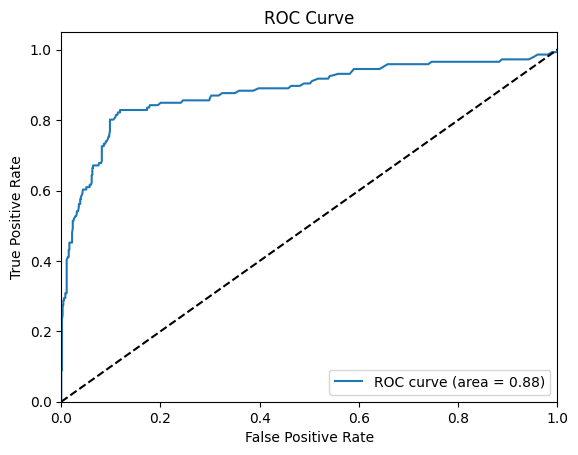

In [66]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, final_Model.predict_proba(X_test)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#**Final Test Data Prediction**

In [67]:
# #Test Data Spliting parts target and Predictors
XX = test.iloc[:,:14].values  #predictors
yy = test.iloc[:,14].values   #target
yy=yy.astype('int')

In [68]:
#Predicting test data
#pred(model_object=final_Model,predictors=XX,compare=yy)

Churn_Pred = final_Model.predict(XX)
cm = pd.crosstab(yy,Churn_Pred)
TN = cm.iloc[0,0]
FN = cm.iloc[1,0]
TP = cm.iloc[1,1]
FP = cm.iloc[0,1]
print("CONFUSION MATRIX ----->> ")
print(cm)
print()
##check accuracy of model
print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



CONFUSION MATRIX ----->> 
col_0    0    1
row_0          
0      464  108
1       35   60

Accuracy :-  78.56
False Negative Rate :-  36.84
False Postive Rate :-  18.88


In [69]:
print(classification_report(yy,Churn_Pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       572
           1       0.36      0.63      0.46        95

    accuracy                           0.79       667
   macro avg       0.64      0.72      0.66       667
weighted avg       0.85      0.79      0.81       667



#**AUC and ROC over Test Data**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



ROC AUC: 0.83


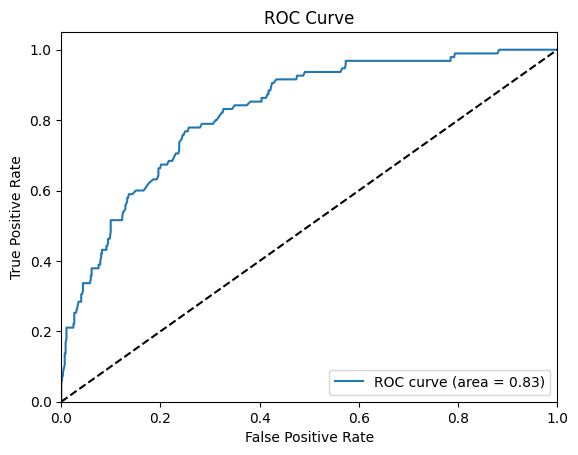

In [70]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(yy, final_Model.predict_proba(XX)[:,1])
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#**Saving the OutPut**

-----------------------------------------------#######################---------------